In [2]:
import traci
import sumolib

In [3]:
#Esta función modifica el programa de los semáforos
def new_logic(ggrr, yyrr, rrgg, rryy):

    tls_ids = traci.trafficlight.getIDList()
    id_semaforo = tls_ids[0]
    programa = traci.trafficlight.getAllProgramLogics(id_semaforo)
    
    from traci._trafficlight import Logic, Phase

    new_logic = Logic(programID="nuevo_programa", type=0,currentPhaseIndex=0,phases=[Phase(duration=ggrr, state="GGrr", minDur=ggrr, maxDur=ggrr ), Phase(duration=yyrr, state='yyrr', minDur=yyrr, maxDur=yyrr), Phase(duration=rrgg, state='rrGG', minDur=rrgg, maxDur=rrgg), Phase(duration=rryy, state='rryy', minDur=rryy, maxDur=rryy)])

    traci.trafficlight.setProgramLogic(id_semaforo, new_logic)

    traci.trafficlight.setProgram(id_semaforo, "nuevo_programa")

    #print(traci.trafficlight.getCompleteRedYellowGreenDefinition(id_semaforo))


In [4]:
import numpy as np

#Esta función define el número de autos que van a aparecer(en promedio) en la ruta r_0(n0) y en la ruta r_1(n1)
def n_vehiculos(n0, n1):

    t0=0
    t1=0
    for i in range(n0):

        t0+= np.random.exponential(scale=3600/n0)

        traci.vehicle.add(
            vehID=f"veh_r0_{i}",
            routeID="r_0", 
            depart=t0
        )

    for i in range(n1):

        t1+= np.random.exponential(scale=3600/n1)

        traci.vehicle.add(
            vehID=f"veh_r1_{i}",
            routeID="r_1",
            depart=t1
        )

In [71]:
#Aquí se llevan a cabo las simulaciones
import random as rd
import pandas as pd
import traci
import sumolib

avgtimes=[]#tiempos promedio
ggrrs = []#(verde Norte-Sur)
yyrrs = []#(amarillo Norte-Sur)
rrggs = []# (verde Este-Oeste)
rryys = []#(amarillo Este-Oeste)
n0s = []#Tiempos ruta 0
n1s = []#Tiempos ruta 1
num_simulations = 750

#Flujos de autos que se van a utilizar
f0 = [i for i in range(10,2000, 100)]
f1 = [i for i in range(10,2500, 100)]


for i in range(num_simulations):

    n0 = rd.choice(f0)
    n1 = rd.choice(f1)

    n0s.append(n0)
    n1s.append(n1)

    sumoBinary = "sumo"
    sumoCmd = [sumoBinary, "-c", "prueba.sumocfg"]

    traci.start(sumoCmd)

    n_vehiculos(n0, n1)

    ggrr = rd.randint(30,70) #(verde Norte-Sur) 
    yyrr = rd.randint(3,7) #(amarillo Norte-Sur)
    rrgg = rd.randint(30,70) # (verde Este-Oeste)
    rryy = rd.randint(3,7) #(amarillo Este-Oeste)

    ggrrs.append(ggrr)
    yyrrs.append(yyrr)
    rrggs.append(rrgg)
    rryys.append(rryy)

    new_logic(ggrr, yyrr, rrgg, rryy)
    
    depart_times = {}
    arrival_times = {}
    simulation_durations = {}

    for step in range(3600):
        traci.simulationStep()

        departed_vehicles = traci.simulation.getDepartedIDList()
        current_time = traci.simulation.getTime()
        for veh_id in departed_vehicles:
            if veh_id not in depart_times:
                depart_times[veh_id] = current_time
        
        

        arrived_vehicles = traci.simulation.getArrivedIDList()
        current_time = traci.simulation.getTime()
        for veh_id in arrived_vehicles:
            if veh_id not in arrival_times:
                arrival_times[veh_id] = current_time



    for veh_id, arrival_time in arrival_times.items():
        if veh_id in depart_times:
            departure_time = depart_times[veh_id]
            duration = arrival_time - departure_time
            simulation_durations[veh_id] = duration

    average = sum(simulation_durations.values())/len(simulation_durations)

    avgtimes.append(average)

    traci.close()
    print(i+1)
data = {
    'Simulation' : range(1, num_simulations + 1),
    'Tiempo promedio' : avgtimes,
    'GGrr (s)' : ggrrs,
    'yyrr (s)' : yyrrs,
    'rrGG (s)' : rrggs,
    'rryy (s)' : rryys,
    'Autos r_0': n0s,
    'Autos r_1': n1s
}

df100 = pd.DataFrame(data)
df100

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
 Retrying in 1 seconds
56
57
58
59
60
61
62
63
64
 Retrying in 1 seconds
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
 Retrying in 1 seconds
Could not connect to TraCI server at localhost:62949 [WinError 10061] No se puede establecer una conexión ya que el equipo de destino denegó expresamente dicha conexión
 Retrying in 1 seconds
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
 Retrying in 1 seconds
151
 Retrying in 1 seconds
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
 Retrying

,Simulation,Tiempo promedio,GGrr (s),yyrr (s),rrGG (s),rryy (s),Autos r_0,Autos r_1
0,1,102.996807,36,5,52,3,1910,410
1,2,113.701532,54,4,68,5,1910,1310
2,3,106.540945,36,6,35,6,1510,1010
3,4,105.545234,45,3,50,6,510,810
4,5,102.732515,38,7,37,6,110,710
...,...,...,...,...,...,...,...,...
745,746,105.781818,44,7,37,5,910,1410
746,747,105.881188,33,4,41,7,1710,2210
747,748,111.429688,65,3,69,4,310,910
748,749,105.937984,36,6,40,6,1510,410


In [ ]:
traci.close()

(1000, 8)

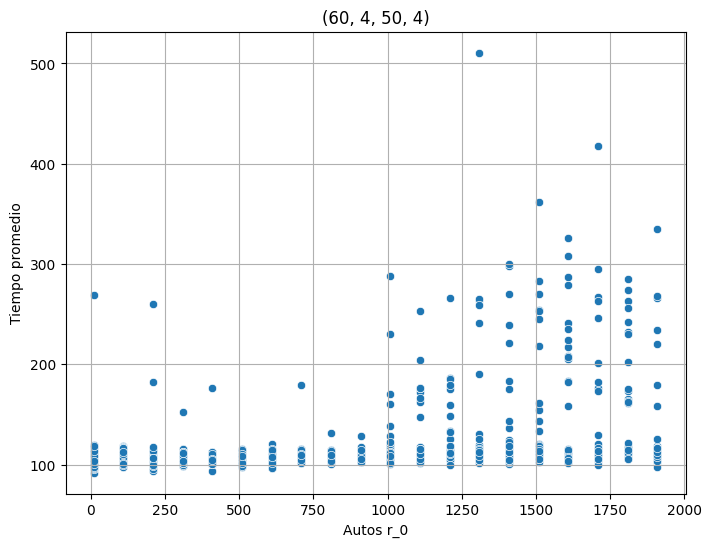

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(8, 6))
sns.scatterplot(x=df100['Autos r_0'], y=df100['Tiempo promedio'])
plt.title('(60, 4, 50, 4)')
plt.grid(True)
plt.show()

In [73]:
df100.to_csv('Sim7-6001-6750.csv', index=False)

In [29]:
traci.close()

In [6]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd


In [75]:
df1 = pd.read_csv('Sim7-1-1000.csv')
df2 = pd.read_csv('Sim7-1001-2000.csv')
df3 = pd.read_csv('Sim7-2001-3000.csv')
df4 = pd.read_csv('Sim7-3001-4000.csv')
df5 = pd.read_csv('Sim7-4001-5000.csv')
df6 = pd.read_csv('Sim7-5001-6000.csv')
df7 = pd.read_csv('Sim7-6001-6750.csv')

In [76]:
data = pd.concat([df1, df2, df3, df4, df5, df6, df7], ignore_index = True)
data.shape

(6750, 8)

In [77]:
variables_independientes = ['GGrr (s)','yyrr (s)','rrGG (s)','rryy (s)','Autos r_0', 'Autos r_1']
variable_dependiente = 'Tiempo promedio'

X = data[variables_independientes]
y = data[variable_dependiente]

X.shape, y.shape

((6750, 6), (6750,))

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print((X_train.shape, X_test.shape, y_train.shape, y_test.shape))

((5400, 6), (1350, 6), (5400,), (1350,))


In [79]:
#Se entrena el modelo de regresión polinomial de grado 3 
modelo3 = make_pipeline( PolynomialFeatures(degree=4), LinearRegression())
modelo3.fit(X_train, y_train)
y_pred3= modelo3.predict(X_test)

In [80]:
#Se evalúa el modelo
mse = mean_squared_error(y_test, y_pred3)  
r2 = r2_score(y_test, y_pred3)
print(f"Error cuadrático medio: {mse}")
print(f"R^2 = {r2}")

Error cuadrático medio: 192.05196122199573
R^2 = 0.8805059393269218


In [81]:
# Obtener los nombres de las características transformadas
modelo_p3 = modelo3.named_steps['linearregression']
transformador = modelo3.named_steps['polynomialfeatures']
nombres_variables = transformador.get_feature_names_out(input_features=X_train.columns)

# Asociar coeficientes a los nombres de las variables
for nombre, coef in zip(nombres_variables, modelo_p3.coef_):
    print(f"{nombre}: {coef}")

1: -5.083389415615226e-08
GGrr (s): 6.242208453499479e-05
yyrr (s): -2.0173923663925186e-05
rrGG (s): 8.741059263576283e-05
rryy (s): -1.1301713273011498e-05
Autos r_0: -0.007501755568158783
Autos r_1: 0.005031536671859045
GGrr (s)^2: 0.002121740457817387
GGrr (s) yyrr (s): -5.106586527448475e-05
GGrr (s) rrGG (s): 0.0013633805035088496
GGrr (s) rryy (s): 1.5460851340768906e-05
GGrr (s) Autos r_0: -0.002777935531938899
GGrr (s) Autos r_1: -0.0023577441780735513
yyrr (s)^2: -0.00017531773452420288
yyrr (s) rrGG (s): -6.896677425039399e-05
yyrr (s) rryy (s): 7.094820371117216e-05
yyrr (s) Autos r_0: -0.03294168702372929
yyrr (s) Autos r_1: 0.016883060786330614
rrGG (s)^2: 0.002997902424023469
rrGG (s) rryy (s): -6.70276643601287e-05
rrGG (s) Autos r_0: 0.00940109886140913
rrGG (s) Autos r_1: -0.0009321257462806879
rryy (s)^2: 0.0001520249617143087
rryy (s) Autos r_0: -0.042225544024001395
rryy (s) Autos r_1: 0.012948623417689466
Autos r_0^2: -7.98662891552261e-05
Autos r_0 Autos r_1: 1.1

In [82]:
import numpy as np
from scipy.optimize import minimize



def modelo_predict(vars_to_optimize, r0, r1):
    GGrr, yyrr, rrGG, rryy = vars_to_optimize
    df_input = pd.DataFrame([{
        'GGrr (s)': GGrr,
        'yyrr (s)': yyrr,
        'rrGG (s)': rrGG,
        'rryy (s)': rryy,
        'Autos r_0': r0,
        'Autos r_1': r1
    }])
    return modelo3.predict(df_input)[0]

# Esta función hace la optimización
def minimizar_modelo(r0, r1):
    def objective(x):  # x contiene GGrr, yyrr, rrGG, rryy
        return modelo_predict(x, r0, r1)

    x0 = np.array([35, 3.5, 35, 3.5])  # valores iniciales arbitrarios
    bounds = [(10, 60), (2, 5), (10, 60), (2, 5)]  

    result = minimize(objective, x0, bounds=bounds)

    if result.success:
        GGrr, yyrr, rrGG, rryy = result.x
        print(f"Valores óptimos para r0 = {r0}, r1 = {r1}:")
        print(f"GGrr  = {GGrr}")
        print(f"yyrr  = {yyrr}")
        print(f"rrGG  = {rrGG}")
        print(f"rryy  = {rryy}")
        print(f"Valor mínimo del modelo: {result.fun}")
        return result.x, result.fun
    else:
        raise RuntimeError("Optimización fallida:", result.message)

In [88]:
minimizar_modelo(1000,900)

Valores óptimos para r0 = 1000, r1 = 900:
GGrr  = 10.0
yyrr  = 5.0
rrGG  = 11.544569636247042
rryy  = 3.2297686995664714
Valor mínimo del modelo: 86.32628838448952


(array([10.        ,  5.        , 11.54456964,  3.2297687 ]),
 np.float64(86.32628838448952))

In [57]:
df_input = pd.DataFrame([{
        'GGrr (s)': 13.709376207532985,
        'yyrr (s)': 5.0,
        'rrGG (s)': 10.0,
        'rryy (s)': 4.214798973202688,
        'Autos r_0': 400,
        'Autos r_1': 400
    }])

modelo3.predict(df_input)

array([78.51904083])